In [1]:
import gymnasium as gym
import numpy as np
import random
from Qtabularfunctions import*
from Cartpolefamily import*
from metaQlearning import*
from plotfunctions import*
import matplotlib.pyplot as plt
import random

In [2]:
# state space limits
low = np.array([-4.8, -3.0, -0.418, -3.5])
high = np.array([4.8, 3.0, 0.418, 3.5])

min_td_error = 1e-3  # Minimum TD error threshold to continue episode
consecutive_small_errors = 5  # Number of consecutive small TD errors to trigger stop

num_actions = 501
lr=0.1
gamma=0.99
epsilon=1
force_mag=100

In [3]:
gen = CartPoleCategoryGenerator()

#initial:
agent = TabularQLearningAgent(
    statespace=[low,high],
    num_actions=num_actions,  
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)

actionspace_dict = {state_tuple: [*range(num_actions)] for state_tuple in agent.disc.get_all_discrete_states()}
actionset_dict = {state_tuple: [] for state_tuple in agent.disc.get_all_discrete_states()}

In [4]:
runner = MetaQLearningRunner(
    gen=gen,  # your environment generator
    low=low,
    high=high, 
    num_actions=num_actions,
    actionset_dict=actionset_dict,
    actionspace_dict=actionspace_dict,
    lr=lr,
    gamma=gamma,
    epsilon=epsilon,
    force_mag=force_mag
)

ANALYZING TRADE-OFF: num_runs vs Performance

Testing with num_runs = 3

Starting 3 experiments with:
  Episodes per run: 10000
  Using actionset as action space: False
  Updating actionset_dict: True

--- Starting Run 1/3 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))


Experiment completed in 19.57 seconds
Mean reward: 23.86 ± 3.93
Early stops: 0/10000
Mode: training
Actionset dictionary was updated
Run 1 completed in 19.57s

--- Starting Run 2/3 ---
Starting experiment with category: easy
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 13.33 seconds
Mean reward: 17.23 ± 2.47
Early stops: 0/10000
Mode: training
Actionset dictionary was updated
Run 2 completed in 13.33s

--- Starting Run 3/3 ---
Starting experiment with category: medium
Using actionspace_dict as action space (training (updating actionset_dict))
Experiment completed in 58.09 seconds
Mean reward: 76.12 ± 32.10
Early stops: 0/10000
Mode: training
Actionset dictionary was updated
Run 3 completed in 58.09s

--- Multiple Runs Summary ---
Total runtime: 90.99s
Average runtime per run: 30.33 ± 19.79s
Average reward: 39.07 ± 26.34

POLICY PERFORMANCE COMPARISON

--- Comparison Run 1/30 ---
Using category: easy
Training with actionspace_dict..

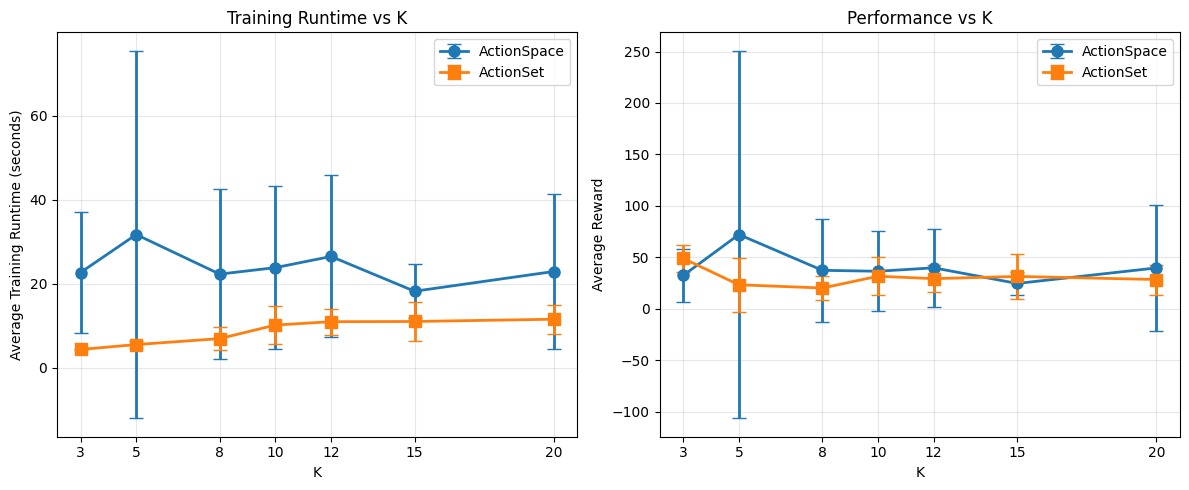

✓ Plot saved to: results/num_runs_tradeoff_20251121_074320_plot.png

DETAILED RESULTS SUMMARY
num_runs= 3: ActionSpace= 32.33, ActionSet= 48.83, Improvement=+16.50
num_runs= 5: ActionSpace= 72.10, ActionSet= 23.23, Improvement=-48.87
num_runs= 8: ActionSpace= 37.30, ActionSet= 20.10, Improvement=-17.20
num_runs=10: ActionSpace= 36.40, ActionSet= 31.57, Improvement=-4.83
num_runs=12: ActionSpace= 39.73, ActionSet= 29.20, Improvement=-10.53
num_runs=15: ActionSpace= 24.53, ActionSet= 31.37, Improvement=+6.83
num_runs=20: ActionSpace= 39.63, ActionSet= 28.37, Improvement=-11.27


<Figure size 640x480 with 0 Axes>

In [5]:
# Normal usage with auto-save
results = analyze_num_runs_tradeoff(runner, 
                    num_runs_list=[3, 5, 8, 10, 12, 15, 20], 
                    episodes_per_run=10000, 
                    num_comparisons=30)


=== Final Plots ===


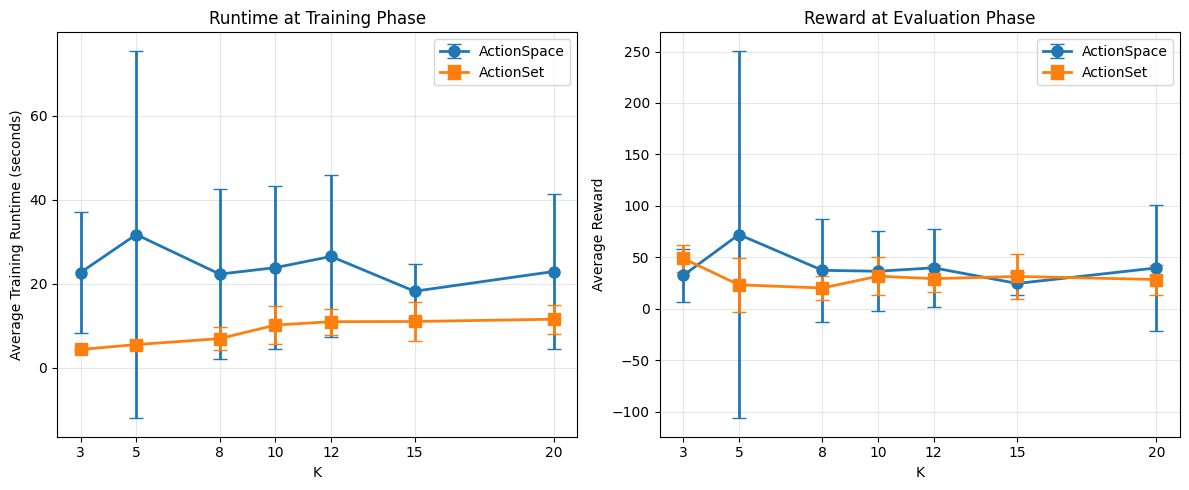

In [5]:
# Step 5: Final plot update
loaded_data = load_tradeoff_data("results/num_runs_tradeoff_20251121_074320_data.pkl")
print("\n=== Final Plots ===")
plot_num_runs_vs_performance(loaded_data)

# # Save the plot
# plot_file = 'results/num_runs_tradeoff_20251119_134116_plot.png'
# plt.savefig(plot_file, dpi=300, bbox_inches='tight')

In [6]:
# # Load previous results
# loaded_data = load_tradeoff_data("results/num_runs_tradeoff_20251119_134116_data.pkl")

# # Resume analysis with additional runs
# additional_results = resume_analysis(
#     runner, 
#     "results/num_runs_tradeoff_20251119_134116_data.pkl",
#     additional_runs=[12, 15, 20]
# )